In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from xgboost import XGBRegressor
from DamageRepair.inference_full import analyze_car
from RepairCost.repair_cost_model_to_import import run_cost_prediction

In [7]:
# csv 로드
df = pd.read_csv("labels_repair_cost_full_test.csv")
df1 = pd.read_csv("labels_repair_cost_full_test_first_only.csv")

In [8]:
# 이미지 기반 repair 추출
def extract_repair_from_images(image_list):
    merged = {}   # {part: set([work, work])}

    for img_path in image_list:
        img_path = "test_images/" + img_path
        if not os.path.exists(img_path):
            print(f"[WARN] 이미지 파일 없음: {img_path}")
            continue

        try:
            result = analyze_car(img_path)
        except Exception as e:
            print(f"[ERROR] analyze_car 실패: {img_path}, 이유: {e}")
            continue

        # result["repair_items"] 파싱
        for item in result.get("repair_items", []):
            part = item.get("part")
            works = item.get("repair_methods", [])

            if part not in merged:
                merged[part] = set()

            merged[part].update(works)

    # part:work,work|part:work 형식으로 변환
    merged_str = "|".join(
        f"{p}:{','.join(sorted(w))}" for p, w in merged.items()
    )

    return merged_str

In [9]:
def predict_cost(df):

    rows = []

    for idx, row in tqdm(df.iterrows(), total=len(df)):

        file_names = row["file_name"].split("|")
        image_paths = [fn.strip() for fn in file_names]

        acc_id = row["accident_id"]
        car_type = row["car_type"]
        total_cost = row["total_cost"]

        repair_pred = extract_repair_from_images(image_paths)

        rows.append({
            "accident_id": acc_id,
            "car_type": car_type,
            "repair_true": row["repair"],
            "repair_pred": repair_pred,
            "total_cost": total_cost
        })


    df_pred = pd.DataFrame(rows)

    return run_cost_prediction(df_pred)

In [12]:
result = predict_cost(df1)

  0%|          | 0/500 [00:00<?, ?it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0203555_as-0098725.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 291.7ms
Speed: 3.2ms preprocess, 291.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  0%|          | 1/500 [00:00<08:08,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250112_as-0098728.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 268.3ms
Speed: 2.6ms preprocess, 268.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  0%|          | 2/500 [00:01<07:50,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306841_as-0098733.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 259.6ms
Speed: 3.1ms preprocess, 259.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  1%|          | 3/500 [00:03<08:56,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125769_as-0098734.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 269.5ms
Speed: 2.9ms preprocess, 269.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


  1%|          | 4/500 [00:04<08:28,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0468337_as-0098735.jpg: 640x480 1 Front bumper, 291.5ms
Speed: 2.0ms preprocess, 291.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


  1%|          | 5/500 [00:04<07:27,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141491_as-0098736.jpg: 640x480 1 Front bumper, 278.3ms
Speed: 3.5ms preprocess, 278.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


  1%|          | 6/500 [00:05<06:43,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0375458_as-0098738.jpg: 640x480 1 Rear lamp(R), 389.0ms
Speed: 2.7ms preprocess, 389.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  1%|▏         | 7/500 [00:06<06:36,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123278_as-0098739.jpg: 640x480 1 Front bumper, 1 Head lights(L), 328.0ms
Speed: 4.0ms preprocess, 328.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 8/500 [00:07<07:14,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0069744_as-0098743.jpg: 640x480 1 Side mirror(L), 311.4ms
Speed: 4.9ms preprocess, 311.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 9/500 [00:07<06:40,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190654_as-0098747.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 297.6ms
Speed: 2.6ms preprocess, 297.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 10/500 [00:08<07:01,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0233464_as-0098751.jpg: 640x480 1 Front bumper, 1 Head lights(R), 284.7ms
Speed: 3.2ms preprocess, 284.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 11/500 [00:09<07:20,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0211491_as-0098753.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 282.5ms
Speed: 3.8ms preprocess, 282.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 12/500 [00:11<08:17,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0395846_as-0098755.jpg: 640x480 1 Roof, 1 Rear lamp(L), 297.2ms
Speed: 17.3ms preprocess, 297.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 13/500 [00:12<08:15,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310907_as-0098758.jpg: 640x480 1 Roof, 1 Rear lamp(L), 262.6ms
Speed: 3.3ms preprocess, 262.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 14/500 [00:13<08:02,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487553_as-0098764.jpg: 640x480 1 Front bumper, 1 Bonnet, 281.4ms
Speed: 2.8ms preprocess, 281.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 15/500 [00:14<07:53,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196166_as-0098767.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 271.7ms
Speed: 3.2ms preprocess, 271.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 16/500 [00:14<07:46,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254763_as-0098768.jpg: 640x480 1 Rear lamp(R), 2 Rear bumpers, 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 309.8ms
Speed: 3.1ms preprocess, 309.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 17/500 [00:17<10:46,  1.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469669_as-0098772.jpg: 640x480 1 Front bumper, 1 Rear door(R), 277.4ms
Speed: 2.5ms preprocess, 277.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


  4%|▎         | 18/500 [00:18<09:49,  1.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348890_as-0098782.jpg: 640x480 1 Front bumper, 1 Head lights(R), 268.0ms
Speed: 2.5ms preprocess, 268.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 19/500 [00:19<09:12,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410551_as-0098787.jpg: 640x480 1 Rear door(R), 280.0ms
Speed: 2.6ms preprocess, 280.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 20/500 [00:19<07:58,  1.00it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0371973_as-0098788.jpg: 640x480 1 Front bumper, 269.1ms
Speed: 2.8ms preprocess, 269.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 21/500 [00:20<07:03,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0025829_as-0098791.jpg: 640x480 1 Rear lamp(L), 282.9ms
Speed: 2.4ms preprocess, 282.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 22/500 [00:21<06:25,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0207232_as-0098792.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 357.5ms
Speed: 3.1ms preprocess, 357.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


  5%|▍         | 23/500 [00:22<07:40,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420344_as-0098793.jpg: 640x480 (no detections), 293.7ms
Speed: 3.1ms preprocess, 293.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


  5%|▍         | 24/500 [00:22<06:09,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0354012_as-0098795.jpg: 640x480 1 Front bumper, 282.4ms
Speed: 2.5ms preprocess, 282.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  5%|▌         | 25/500 [00:23<05:58,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149771_as-0098798.jpg: 640x480 (no detections), 379.8ms
Speed: 3.5ms preprocess, 379.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


  5%|▌         | 26/500 [00:23<05:10,  1.53it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306901_as-0098799.jpg: 640x480 1 Front bumper, 1 Head lights(L), 286.4ms
Speed: 2.4ms preprocess, 286.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  5%|▌         | 27/500 [00:24<06:07,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0050388_as-0098801.jpg: 640x480 (no detections), 294.8ms
Speed: 3.3ms preprocess, 294.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


  6%|▌         | 28/500 [00:25<05:02,  1.56it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472899_as-0098802.jpg: 640x480 1 Front bumper, 287.0ms
Speed: 2.7ms preprocess, 287.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


  6%|▌         | 29/500 [00:25<05:09,  1.52it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160490_as-0098806.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 315.8ms
Speed: 3.6ms preprocess, 315.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  6%|▌         | 30/500 [00:26<05:55,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046760_as-0098808.jpg: 480x640 1 Rear lamp(L), 302.9ms
Speed: 3.0ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


  6%|▌         | 31/500 [00:27<05:46,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487292_as-0098809.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 336.0ms
Speed: 4.8ms preprocess, 336.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


  6%|▋         | 32/500 [00:28<06:25,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0216535_as-0098810.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 276.3ms
Speed: 2.4ms preprocess, 276.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 33/500 [00:29<06:41,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276573_as-0098817.jpg: 640x480 2 Side mirror(L)s, 269.2ms
Speed: 2.7ms preprocess, 269.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 34/500 [00:30<06:49,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320514_as-0098821.jpg: 640x480 1 Rear lamp(L), 294.6ms
Speed: 2.4ms preprocess, 294.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 35/500 [00:31<06:20,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0080813_as-0098829.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 275.2ms
Speed: 2.9ms preprocess, 275.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 36/500 [00:32<06:50,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0219167_as-0098830.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 299.4ms
Speed: 2.6ms preprocess, 299.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 37/500 [00:33<07:51,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0331591_as-0098833.jpg: 640x480 1 Roof, 1 Rear lamp(L), 299.8ms
Speed: 2.9ms preprocess, 299.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 38/500 [00:34<07:51,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0016664_as-0098835.jpg: 640x480 2 Front bumpers, 329.9ms
Speed: 2.7ms preprocess, 329.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 39/500 [00:35<08:01,  1.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0509247_as-0098836.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 294.4ms
Speed: 1.7ms preprocess, 294.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 40/500 [00:37<09:22,  1.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064202_as-0098838.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 318.4ms
Speed: 3.9ms preprocess, 318.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 41/500 [00:38<08:59,  1.18s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0338341_as-0098841.jpg: 640x480 1 Front bumper, 2 Head lights(L)s, 1 Rear lamp(R), 267.0ms
Speed: 1.8ms preprocess, 267.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 42/500 [00:40<10:15,  1.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0316445_as-0098842.jpg: 640x480 (no detections), 364.7ms
Speed: 3.2ms preprocess, 364.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


  9%|▊         | 43/500 [00:40<08:05,  1.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250339_as-0098845.jpg: 480x640 1 Rocker panel(L), 280.0ms
Speed: 2.7ms preprocess, 280.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


  9%|▉         | 44/500 [00:41<07:06,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125282_as-0098848.jpg: 640x480 1 Front bumper, 1 Head lights(L), 294.9ms
Speed: 2.7ms preprocess, 294.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


  9%|▉         | 45/500 [00:42<07:14,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0544131_as-0098850.jpg: 640x480 1 Rear bumper, 305.5ms
Speed: 3.0ms preprocess, 305.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  9%|▉         | 46/500 [00:42<06:36,  1.15it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0318184_as-0098852.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 273.6ms
Speed: 3.0ms preprocess, 273.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  9%|▉         | 47/500 [00:44<07:27,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0504949_as-0098854.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 266.5ms
Speed: 2.4ms preprocess, 266.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 10%|▉         | 48/500 [00:45<07:23,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038676_as-0098855.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 277.8ms
Speed: 2.9ms preprocess, 277.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 10%|▉         | 49/500 [00:46<08:12,  1.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0467691_as-0098859.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 282.4ms
Speed: 3.3ms preprocess, 282.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


 10%|█         | 50/500 [00:47<07:59,  1.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382081_as-0098862.jpg: 640x480 1 Front bumper, 261.1ms
Speed: 2.7ms preprocess, 261.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 10%|█         | 51/500 [00:48<06:58,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0389594_as-0098864.jpg: 640x480 1 Front bumper, 1 Head lights(R), 262.9ms
Speed: 2.4ms preprocess, 262.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 10%|█         | 52/500 [00:48<06:56,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0245480_as-0098865.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 263.2ms
Speed: 2.5ms preprocess, 263.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 53/500 [00:49<06:55,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0569102_as-0098870.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 266.8ms
Speed: 2.4ms preprocess, 266.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 54/500 [00:50<07:00,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421989_as-0098871.jpg: 640x480 (no detections), 295.4ms
Speed: 2.8ms preprocess, 295.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 55/500 [00:51<05:38,  1.31it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0049109_as-0098875.jpg: 640x480 1 Rear lamp(L), 287.8ms
Speed: 3.8ms preprocess, 287.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 56/500 [00:51<05:28,  1.35it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0376810_as-0098879.jpg: 640x480 1 Front bumper, 287.6ms
Speed: 2.6ms preprocess, 287.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 11%|█▏        | 57/500 [00:52<05:16,  1.40it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0096537_as-0098887.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 266.9ms
Speed: 2.6ms preprocess, 266.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 12%|█▏        | 58/500 [00:53<05:44,  1.28it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0440860_as-0098888.jpg: 640x480 1 Rear door(R), 267.4ms
Speed: 2.6ms preprocess, 267.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 12%|█▏        | 59/500 [00:54<05:23,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0246317_as-0098892.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 267.0ms
Speed: 2.4ms preprocess, 267.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 12%|█▏        | 60/500 [00:54<05:47,  1.27it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033410_as-0098895.jpg: 480x640 1 Head lights(L), 270.8ms
Speed: 2.5ms preprocess, 270.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 12%|█▏        | 61/500 [00:55<05:25,  1.35it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0029445_as-0098898.jpg: 640x480 1 Side mirror(L), 1 Rear door(L), 1 Rocker panel(L), 312.3ms
Speed: 2.9ms preprocess, 312.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 12%|█▏        | 62/500 [00:56<06:46,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273291_as-0098899.jpg: 640x480 1 Roof, 1 Rear lamp(L), 295.4ms
Speed: 2.9ms preprocess, 295.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 63/500 [00:58<07:01,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275706_as-0098900.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 270.6ms
Speed: 2.8ms preprocess, 270.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 64/500 [00:58<06:57,  1.04it/s]

[WARN] 이미지 파일 없음: test_images/0028011_as-0098901.jpg

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034920_as-0098902.jpg: 640x480 1 Front bumper, 268.5ms
Speed: 2.7ms preprocess, 268.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 66/500 [00:59<04:46,  1.51it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418837_as-0098903.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 269.9ms
Speed: 2.8ms preprocess, 269.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 67/500 [01:00<05:14,  1.38it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0037060_as-0098904.jpg: 640x480 1 Rocker panel(L), 254.6ms
Speed: 2.5ms preprocess, 254.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 14%|█▎        | 68/500 [01:01<05:01,  1.44it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0226570_as-0098905.jpg: 480x640 1 Front bumper, 251.7ms
Speed: 1.8ms preprocess, 251.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 14%|█▍        | 69/500 [01:01<04:49,  1.49it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160488_as-0098907.jpg: 640x480 (no detections), 292.8ms
Speed: 3.1ms preprocess, 292.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 14%|█▍        | 70/500 [01:02<04:08,  1.73it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489769_as-0098908.jpg: 640x480 1 Front bumper, 1 Head lights(L), 285.1ms
Speed: 2.7ms preprocess, 285.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 14%|█▍        | 71/500 [01:03<04:55,  1.45it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317321_as-0098913.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 284.4ms
Speed: 2.4ms preprocess, 284.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 14%|█▍        | 72/500 [01:04<05:29,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0470991_as-0098915.jpg: 640x480 1 Front bumper, 1 Head lights(R), 264.5ms
Speed: 2.5ms preprocess, 264.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▍        | 73/500 [01:04<05:48,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0345418_as-0098918.jpg: 640x480 (no detections), 286.5ms
Speed: 2.6ms preprocess, 286.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▍        | 74/500 [01:05<04:45,  1.49it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149097_as-0098920.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 265.3ms
Speed: 2.6ms preprocess, 265.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▌        | 75/500 [01:06<05:16,  1.34it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472192_as-0098923.jpg: 640x480 1 Side mirror(L), 254.3ms
Speed: 2.5ms preprocess, 254.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▌        | 76/500 [01:06<04:59,  1.42it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0087481_as-0098926.jpg: 640x480 1 Front bumper, 1 Head lights(L), 260.5ms
Speed: 2.7ms preprocess, 260.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▌        | 77/500 [01:07<05:27,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0075880_as-0098928.jpg: 640x480 1 Rear lamp(L), 312.3ms
Speed: 3.1ms preprocess, 312.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 16%|█▌        | 78/500 [01:08<05:18,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034842_as-0098931.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 304.6ms
Speed: 2.6ms preprocess, 304.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


 16%|█▌        | 79/500 [01:09<05:50,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0390865_as-0098936.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 288.6ms
Speed: 2.9ms preprocess, 288.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


 16%|█▌        | 80/500 [01:10<06:06,  1.15it/s]

[WARN] 이미지 파일 없음: test_images/0064814_as-0098937.jpg

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327606_as-0098938.jpg: 640x480 1 Rear lamp(L), 257.6ms
Speed: 2.5ms preprocess, 257.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 16%|█▋        | 82/500 [01:11<04:15,  1.63it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0255353_as-0098940.jpg: 480x640 1 Front fender(L), 1 Front fender(R), 254.4ms
Speed: 2.4ms preprocess, 254.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 17%|█▋        | 83/500 [01:11<04:47,  1.45it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073219_as-0098942.jpg: 640x480 1 Front bumper, 268.8ms
Speed: 2.5ms preprocess, 268.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 84/500 [01:12<04:37,  1.50it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0495571_as-0098945.jpg: 640x480 1 Rear lamp(L), 269.8ms
Speed: 2.5ms preprocess, 269.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 85/500 [01:13<04:31,  1.53it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463007_as-0098947.jpg: 640x480 1 Front bumper, 246.0ms
Speed: 2.8ms preprocess, 246.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 86/500 [01:13<04:26,  1.56it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190150_as-0098948.jpg: 640x480 1 Rear bumper, 262.0ms
Speed: 2.5ms preprocess, 262.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 87/500 [01:14<04:20,  1.58it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275574_as-0098952.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 267.0ms
Speed: 2.6ms preprocess, 267.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 18%|█▊        | 88/500 [01:15<05:42,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124167_as-0098953.jpg: 640x480 1 Front bumper, 288.0ms
Speed: 4.9ms preprocess, 288.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 89/500 [01:16<05:22,  1.27it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0067089_as-0098954.jpg: 640x480 1 Rear lamp(R), 304.9ms
Speed: 2.7ms preprocess, 304.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 90/500 [01:17<05:09,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0221634_as-0098957.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 279.7ms
Speed: 3.1ms preprocess, 279.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 91/500 [01:18<06:09,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275992_as-0098958.jpg: 640x480 1 Rear lamp(L), 270.5ms
Speed: 2.5ms preprocess, 270.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 92/500 [01:19<05:45,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489404_as-0098964.jpg: 640x480 1 Front bumper, 1 Head lights(L), 306.7ms
Speed: 2.9ms preprocess, 306.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 19%|█▊        | 93/500 [01:20<05:56,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0374793_as-0098968.jpg: 640x480 1 Front bumper, 1 Head lights(L), 263.3ms
Speed: 1.7ms preprocess, 263.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 19%|█▉        | 94/500 [01:20<06:04,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313721_as-0098970.jpg: 640x480 1 Rear lamp(L), 315.5ms
Speed: 2.7ms preprocess, 315.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 19%|█▉        | 95/500 [01:21<05:55,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0272091_as-0098973.jpg: 640x480 (no detections), 367.6ms
Speed: 3.3ms preprocess, 367.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 19%|█▉        | 96/500 [01:22<04:59,  1.35it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0326395_as-0098983.jpg: 640x480 1 Front bumper, 1 Rear door(R), 356.9ms
Speed: 2.8ms preprocess, 356.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


 19%|█▉        | 97/500 [01:23<05:54,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0390750_as-0098988.jpg: 640x480 1 Front bumper, 285.9ms
Speed: 2.4ms preprocess, 285.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 20%|█▉        | 98/500 [01:24<05:27,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0191903_as-0098989.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 286.6ms
Speed: 2.6ms preprocess, 286.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 20%|█▉        | 99/500 [01:25<05:42,  1.17it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0228705_as-0098992.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 1 Side mirror(L), 258.1ms
Speed: 2.5ms preprocess, 258.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 20%|██        | 100/500 [01:26<06:23,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0413957_as-0098994.jpg: 640x480 1 Front bumper, 266.6ms
Speed: 2.4ms preprocess, 266.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 20%|██        | 101/500 [01:26<05:50,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0383611_as-0098996.jpg: 640x480 (no detections), 280.7ms
Speed: 2.0ms preprocess, 280.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 20%|██        | 102/500 [01:27<04:42,  1.41it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045922_as-0098997.jpg: 640x480 1 Front bumper, 1 Rear door(R), 300.0ms
Speed: 2.5ms preprocess, 300.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 21%|██        | 103/500 [01:28<05:24,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0220246_as-0099003.jpg: 480x640 1 Front bumper, 1 Head lights(L), 286.8ms
Speed: 2.1ms preprocess, 286.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 21%|██        | 104/500 [01:29<05:44,  1.15it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0381745_as-0099004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 297.1ms
Speed: 2.9ms preprocess, 297.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 21%|██        | 105/500 [01:30<06:32,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337893_as-0099006.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 274.5ms
Speed: 2.8ms preprocess, 274.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 21%|██        | 106/500 [01:31<06:28,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0593678_as-0099010.jpg: 480x640 1 Rear lamp(L), 1 Front fender(L), 1 Side mirror(L), 268.9ms
Speed: 2.4ms preprocess, 268.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 21%|██▏       | 107/500 [01:32<06:55,  1.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0243836_as-0099011.jpg: 480x640 1 Front bumper, 263.8ms
Speed: 2.5ms preprocess, 263.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 22%|██▏       | 108/500 [01:33<06:02,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251837_as-0099013.jpg: 640x480 1 Roof, 1 Rear lamp(L), 285.7ms
Speed: 3.0ms preprocess, 285.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 22%|██▏       | 109/500 [01:34<06:04,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252730_as-0099014.jpg: 640x480 1 Front bumper, 285.0ms
Speed: 2.6ms preprocess, 285.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 22%|██▏       | 110/500 [01:34<05:31,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0601237_as-0099015.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 260.9ms
Speed: 3.4ms preprocess, 260.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 22%|██▏       | 111/500 [01:35<05:40,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073757_as-0099016.jpg: 640x480 1 Front bumper, 1 Head lights(R), 280.8ms
Speed: 3.6ms preprocess, 280.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 22%|██▏       | 112/500 [01:36<05:51,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0113922_as-0099017.jpg: 640x480 1 Front bumper, 1 Head lights(L), 369.8ms
Speed: 2.7ms preprocess, 369.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 113/500 [01:37<06:04,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0090621_as-0099018.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 257.4ms
Speed: 2.9ms preprocess, 257.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 114/500 [01:38<05:58,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351203_as-0099019.jpg: 480x640 1 Front bumper, 1 Head lights(R), 262.5ms
Speed: 2.3ms preprocess, 262.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 23%|██▎       | 115/500 [01:39<05:59,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446259_as-0099022.jpg: 640x480 (no detections), 302.9ms
Speed: 2.1ms preprocess, 302.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 116/500 [01:40<04:50,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0602303_as-0099024.jpg: 640x480 1 Side mirror(L), 271.6ms
Speed: 1.7ms preprocess, 271.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 117/500 [01:40<04:36,  1.38it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149283_as-0099027.jpg: 640x480 1 Front fender(R), 2 Rear door(L)s, 282.2ms
Speed: 3.0ms preprocess, 282.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▎       | 118/500 [01:42<05:40,  1.12it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0397815_as-0099033.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 271.0ms
Speed: 3.3ms preprocess, 271.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 119/500 [01:42<05:43,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0329452_as-0099037.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 1 Rocker panel(L), 297.7ms
Speed: 2.8ms preprocess, 297.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 120/500 [01:44<07:06,  1.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134439_as-0099038.jpg: 640x480 1 Front bumper, 290.6ms
Speed: 2.5ms preprocess, 290.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 121/500 [01:45<06:14,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0365736_as-0099041.jpg: 640x480 1 Roof, 1 Rear lamp(L), 288.7ms
Speed: 2.5ms preprocess, 288.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 122/500 [01:46<06:16,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0056226_as-0099050.jpg: 640x480 1 Side mirror(L), 287.9ms
Speed: 2.6ms preprocess, 287.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▍       | 123/500 [01:46<05:36,  1.12it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0497232_as-0099052.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 281.9ms
Speed: 2.8ms preprocess, 281.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▍       | 124/500 [01:47<05:51,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0198365_as-0099057.jpg: 640x480 1 Bonnet, 1 Side mirror(L), 1 Rocker panel(R), 339.0ms
Speed: 4.9ms preprocess, 339.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▌       | 125/500 [01:49<06:41,  1.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399403_as-0099059.jpg: 640x480 1 Rear lamp(R), 300.9ms
Speed: 2.9ms preprocess, 300.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▌       | 126/500 [01:50<05:58,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0128711_as-0099060.jpg: 640x480 1 Front bumper, 1 Head lights(L), 283.7ms
Speed: 3.3ms preprocess, 283.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▌       | 127/500 [01:51<05:55,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435857_as-0099062.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 276.5ms
Speed: 4.5ms preprocess, 276.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 128/500 [01:51<05:55,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0550680_as-0099066.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 1 Front fender(L), 278.8ms
Speed: 2.4ms preprocess, 278.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 129/500 [01:53<07:41,  1.24s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124958_as-0099067.jpg: 640x480 1 Front bumper, 290.8ms
Speed: 4.4ms preprocess, 290.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 130/500 [01:54<06:31,  1.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0571962_as-0099070.jpg: 640x480 1 Front bumper, 316.9ms
Speed: 10.2ms preprocess, 316.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 131/500 [01:55<05:52,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0387276_as-0099072.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 248.7ms
Speed: 2.5ms preprocess, 248.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▋       | 132/500 [01:56<07:04,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0528493_as-0099076.jpg: 640x480 1 Rear lamp(L), 304.8ms
Speed: 1.9ms preprocess, 304.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 133/500 [01:57<06:16,  1.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0036491_as-0099078.jpg: 640x480 1 Front bumper, 308.7ms
Speed: 6.1ms preprocess, 308.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 134/500 [01:58<05:46,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235451_as-0099084.jpg: 480x640 1 Head lights(L), 378.0ms
Speed: 3.4ms preprocess, 378.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


 27%|██▋       | 135/500 [01:59<05:23,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0176654_as-0099086.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 275.2ms
Speed: 2.7ms preprocess, 275.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 136/500 [02:00<05:28,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315429_as-0099092.jpg: 640x480 (no detections), 278.0ms
Speed: 2.9ms preprocess, 278.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 137/500 [02:00<04:24,  1.37it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0227230_as-0099098.jpg: 480x640 1 Rear lamp(L), 270.1ms
Speed: 1.9ms preprocess, 270.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 28%|██▊       | 138/500 [02:00<04:11,  1.44it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414330_as-0099100.jpg: 640x480 1 Front bumper, 305.0ms
Speed: 2.1ms preprocess, 305.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 28%|██▊       | 139/500 [02:01<04:08,  1.45it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0605369_as-0099102.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 309.3ms
Speed: 2.4ms preprocess, 309.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 28%|██▊       | 140/500 [02:02<04:51,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330756_as-0099103.jpg: 640x480 1 Side mirror(L), 301.7ms
Speed: 3.3ms preprocess, 301.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 28%|██▊       | 141/500 [02:03<04:36,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503089_as-0099105.jpg: 480x640 1 Front bumper, 273.0ms
Speed: 2.6ms preprocess, 273.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 28%|██▊       | 142/500 [02:04<04:20,  1.38it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0350328_as-0099113.jpg: 640x480 1 Rear bumper, 276.7ms
Speed: 2.5ms preprocess, 276.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▊       | 143/500 [02:04<04:08,  1.44it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433170_as-0099116.jpg: 480x640 1 Front bumper, 1 Head lights(L), 263.1ms
Speed: 3.2ms preprocess, 263.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 29%|██▉       | 144/500 [02:05<04:30,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327715_as-0099120.jpg: 640x480 1 Rear lamp(R), 269.7ms
Speed: 2.5ms preprocess, 269.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▉       | 145/500 [02:06<04:14,  1.40it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373109_as-0099121.jpg: 480x640 1 Rear lamp(L), 267.6ms
Speed: 2.5ms preprocess, 267.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 29%|██▉       | 146/500 [02:06<04:06,  1.43it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0233885_as-0099124.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 270.8ms
Speed: 3.5ms preprocess, 270.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 29%|██▉       | 147/500 [02:07<04:33,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0161654_as-0099125.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 318.2ms
Speed: 3.6ms preprocess, 318.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 30%|██▉       | 148/500 [02:09<05:34,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0222315_as-0099128.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 280.2ms
Speed: 2.6ms preprocess, 280.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 30%|██▉       | 149/500 [02:10<05:27,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0564659_as-0099133.jpg: 640x480 1 Rocker panel(L), 250.1ms
Speed: 2.4ms preprocess, 250.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 30%|███       | 150/500 [02:10<04:49,  1.21it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251414_as-0099137.jpg: 480x640 2 Rear lamp(L)s, 330.8ms
Speed: 2.5ms preprocess, 330.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 30%|███       | 151/500 [02:11<05:11,  1.12it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116171_as-0099140.jpg: 640x480 1 Side mirror(L), 271.4ms
Speed: 1.8ms preprocess, 271.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 30%|███       | 152/500 [02:12<04:41,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0104604_as-0099141.jpg: 640x480 1 Front bumper, 266.8ms
Speed: 2.2ms preprocess, 266.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 153/500 [02:12<04:23,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330559_as-0099144.jpg: 640x480 1 Roof, 1 Rear lamp(L), 271.2ms
Speed: 2.3ms preprocess, 271.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 154/500 [02:13<04:37,  1.25it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315293_as-0099151.jpg: 640x480 1 Rear lamp(L), 282.6ms
Speed: 1.7ms preprocess, 282.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 155/500 [02:14<04:18,  1.34it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0628082_as-0099154.jpg: 640x480 1 Front bumper, 248.2ms
Speed: 2.5ms preprocess, 248.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 156/500 [02:15<04:00,  1.43it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0486735_as-0099155.jpg: 640x480 1 Front bumper, 1 Head lights(L), 249.9ms
Speed: 1.7ms preprocess, 249.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 31%|███▏      | 157/500 [02:15<04:18,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064508_as-0099156.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 1 Side mirror(L), 284.8ms
Speed: 3.1ms preprocess, 284.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 158/500 [02:17<05:10,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358124_as-0099158.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 275.7ms
Speed: 3.5ms preprocess, 275.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 159/500 [02:18<05:13,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0427918_as-0099166.jpg: 640x480 2 Head lights(L)s, 277.8ms
Speed: 1.7ms preprocess, 277.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 160/500 [02:19<05:11,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0110003_as-0099169.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 249.7ms
Speed: 2.5ms preprocess, 249.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 161/500 [02:19<05:06,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212177_as-0099177.jpg: 640x480 1 Rear lamp(L), 243.4ms
Speed: 2.5ms preprocess, 243.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 162/500 [02:20<04:32,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009223_as-0099186.jpg: 480x640 1 Rear lamp(L), 260.4ms
Speed: 2.3ms preprocess, 260.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 33%|███▎      | 163/500 [02:21<04:11,  1.34it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053770_as-0099188.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 261.5ms
Speed: 2.5ms preprocess, 261.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 33%|███▎      | 164/500 [02:22<04:30,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0253272_as-0099190.jpg: 480x640 1 Rear lamp(L), 277.3ms
Speed: 1.8ms preprocess, 277.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 33%|███▎      | 165/500 [02:22<04:10,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454790_as-0099191.jpg: 640x480 (no detections), 301.5ms
Speed: 1.9ms preprocess, 301.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 33%|███▎      | 166/500 [02:22<03:29,  1.60it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0042965_as-0099198.jpg: 640x480 (no detections), 250.6ms
Speed: 2.9ms preprocess, 250.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 33%|███▎      | 167/500 [02:23<02:55,  1.90it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0247243_as-0099199.jpg: 640x480 1 Front bumper, 1 Head lights(L), 259.7ms
Speed: 2.7ms preprocess, 259.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 34%|███▎      | 168/500 [02:24<03:31,  1.57it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0198403_as-0099201.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 251.0ms
Speed: 2.4ms preprocess, 251.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 34%|███▍      | 169/500 [02:25<03:58,  1.39it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0331421_as-0099202.jpg: 640x480 1 Rear lamp(L), 256.3ms
Speed: 2.3ms preprocess, 256.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 34%|███▍      | 170/500 [02:25<03:46,  1.46it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0091186_as-0099209.jpg: 480x640 1 Rocker panel(L), 272.1ms
Speed: 2.5ms preprocess, 272.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 34%|███▍      | 171/500 [02:26<03:41,  1.48it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454235_as-0099210.jpg: 480x640 1 Front bumper, 312.7ms
Speed: 3.4ms preprocess, 312.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 34%|███▍      | 172/500 [02:27<03:41,  1.48it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0107868_as-0099216.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 255.9ms
Speed: 3.1ms preprocess, 255.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▍      | 173/500 [02:27<04:03,  1.34it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0215303_as-0099222.jpg: 480x640 1 Front bumper, 1 Head lights(L), 256.8ms
Speed: 2.4ms preprocess, 256.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▍      | 174/500 [02:28<04:17,  1.27it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0165512_as-0099224.jpg: 480x640 1 Rear lamp(L), 260.6ms
Speed: 2.6ms preprocess, 260.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▌      | 175/500 [02:29<03:57,  1.37it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0403909_as-0099227.jpg: 640x480 1 Trunk lid, 1 Rear door(L), 287.8ms
Speed: 2.5ms preprocess, 287.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 35%|███▌      | 176/500 [02:30<04:21,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0380885_as-0099229.jpg: 640x480 1 Side mirror(L), 276.1ms
Speed: 2.8ms preprocess, 276.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 35%|███▌      | 177/500 [02:31<04:02,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0120895_as-0099232.jpg: 480x640 1 Front bumper, 264.8ms
Speed: 1.7ms preprocess, 264.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 36%|███▌      | 178/500 [02:31<03:48,  1.41it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0047785_as-0099238.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 255.0ms
Speed: 2.9ms preprocess, 255.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▌      | 179/500 [02:32<04:35,  1.17it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0338818_as-0099243.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 288.8ms
Speed: 2.7ms preprocess, 288.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▌      | 180/500 [02:33<04:43,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414325_as-0099244.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 276.0ms
Speed: 3.5ms preprocess, 276.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▌      | 181/500 [02:34<04:47,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0282761_as-0099251.jpg: 640x480 1 Front bumper, 1 Head lights(R), 272.9ms
Speed: 1.8ms preprocess, 272.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▋      | 182/500 [02:35<04:49,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0213467_as-0099256.jpg: 640x480 1 Roof, 1 Rear lamp(L), 253.0ms
Speed: 2.5ms preprocess, 253.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 183/500 [02:36<04:47,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0321546_as-0099257.jpg: 640x480 1 Front bumper, 1 Rear bumper, 263.6ms
Speed: 2.7ms preprocess, 263.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 184/500 [02:37<04:51,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0230455_as-0099262.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 279.8ms
Speed: 2.5ms preprocess, 279.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 185/500 [02:38<04:54,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0428077_as-0099264.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 289.4ms
Speed: 2.2ms preprocess, 289.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 186/500 [02:39<05:25,  1.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295000_as-0099266.jpg: 640x480 1 Rear lamp(L), 267.1ms
Speed: 1.8ms preprocess, 267.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 187/500 [02:40<04:43,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473129_as-0099273.jpg: 640x480 1 Rocker panel(L), 261.1ms
Speed: 2.7ms preprocess, 261.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 188/500 [02:40<04:12,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023223_as-0099274.jpg: 640x480 1 Front bumper, 266.9ms
Speed: 2.2ms preprocess, 266.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 189/500 [02:41<03:53,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0040241_as-0099276.jpg: 640x480 1 Rear lamp(L), 258.6ms
Speed: 3.0ms preprocess, 258.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 190/500 [02:42<03:39,  1.41it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0271453_as-0099282.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 252.0ms
Speed: 2.0ms preprocess, 252.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 191/500 [02:43<04:28,  1.15it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0484767_as-0099285.jpg: 480x640 1 Rear lamp(L), 255.6ms
Speed: 1.7ms preprocess, 255.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


 38%|███▊      | 192/500 [02:44<04:04,  1.26it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088376_as-0099288.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 278.7ms
Speed: 1.8ms preprocess, 278.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 39%|███▊      | 193/500 [02:45<04:46,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0328742_as-0099292.jpg: 480x640 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 252.0ms
Speed: 2.5ms preprocess, 252.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 194/500 [02:46<05:09,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0004703_as-0099293.jpg: 480x640 1 Rear lamp(R), 1 Side mirror(L), 1 Rocker panel(L), 270.1ms
Speed: 2.6ms preprocess, 270.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 195/500 [02:47<05:29,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0117327_as-0099302.jpg: 480x640 1 Front bumper, 1 Head lights(L), 273.7ms
Speed: 3.5ms preprocess, 273.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 196/500 [02:48<05:16,  1.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160408_as-0099304.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 287.9ms
Speed: 2.1ms preprocess, 287.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 197/500 [02:49<05:35,  1.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0559126_as-0099306.jpg: 480x640 1 Head lights(L), 1 Head lights(R), 1 Rear door(R), 267.0ms
Speed: 2.6ms preprocess, 267.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 40%|███▉      | 198/500 [02:51<05:46,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0143627_as-0099308.jpg: 480x640 1 Rear lamp(L), 276.9ms
Speed: 2.6ms preprocess, 276.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 40%|███▉      | 199/500 [02:51<05:00,  1.00it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0631123_as-0099320.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 290.0ms
Speed: 3.2ms preprocess, 290.0ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


 40%|████      | 200/500 [02:52<04:58,  1.00it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009342_as-0099321.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 276.4ms
Speed: 3.0ms preprocess, 276.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 40%|████      | 201/500 [02:53<04:56,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062740_as-0099322.jpg: 640x480 1 Front bumper, 1 Head lights(L), 275.5ms
Speed: 2.6ms preprocess, 275.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 40%|████      | 202/500 [02:54<04:49,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0109809_as-0099324.jpg: 640x480 1 Front fender(R), 1 Side mirror(L), 1 Rear door(L), 271.1ms
Speed: 2.5ms preprocess, 271.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 203/500 [02:56<05:19,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062032_as-0099328.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 293.1ms
Speed: 2.0ms preprocess, 293.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 204/500 [02:57<05:16,  1.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0400934_as-0099331.jpg: 640x480 1 Rear lamp(L), 374.5ms
Speed: 3.3ms preprocess, 374.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 205/500 [02:57<04:49,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391338_as-0099333.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 1 Side mirror(L), 341.6ms
Speed: 3.1ms preprocess, 341.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 206/500 [02:59<05:29,  1.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310036_as-0099335.jpg: 480x640 1 Rear lamp(R), 1 Front fender(L), 293.3ms
Speed: 2.8ms preprocess, 293.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 41%|████▏     | 207/500 [03:00<05:16,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0405998_as-0099336.jpg: 640x480 1 Rear lamp(L), 283.1ms
Speed: 2.6ms preprocess, 283.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 208/500 [03:00<04:39,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0359015_as-0099338.jpg: 640x480 1 Front bumper, 1 Side mirror(L), 328.6ms
Speed: 2.9ms preprocess, 328.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 209/500 [03:02<04:47,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320134_as-0099340.jpg: 640x480 1 Roof, 1 Rear lamp(L), 278.1ms
Speed: 2.8ms preprocess, 278.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 210/500 [03:03<04:46,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373854_as-0099342.jpg: 480x640 1 Roof, 1 Rear lamp(L), 337.2ms
Speed: 16.6ms preprocess, 337.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 42%|████▏     | 211/500 [03:04<04:49,  1.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0501390_as-0099346.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 299.6ms
Speed: 2.6ms preprocess, 299.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 212/500 [03:05<04:53,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0067054_as-0099349.jpg: 480x640 1 Roof, 1 Rear lamp(L), 281.3ms
Speed: 2.7ms preprocess, 281.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 213/500 [03:06<05:01,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237302_as-0099351.jpg: 640x480 (no detections), 328.3ms
Speed: 3.4ms preprocess, 328.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 43%|████▎     | 214/500 [03:06<04:01,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0346806_as-0099355.jpg: 640x480 1 Front bumper, 320.8ms
Speed: 3.3ms preprocess, 320.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 43%|████▎     | 215/500 [03:07<03:51,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0084885_as-0099357.jpg: 480x640 (no detections), 304.7ms
Speed: 3.0ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 216/500 [03:07<03:10,  1.49it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0175231_as-0099362.jpg: 480x640 1 Rear lamp(L), 312.2ms
Speed: 2.8ms preprocess, 312.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 217/500 [03:08<03:12,  1.47it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038332_as-0099366.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 304.2ms
Speed: 3.0ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 44%|████▎     | 218/500 [03:09<03:38,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0617373_as-0099367.jpg: 640x480 1 Front bumper, 1 Head lights(L), 287.4ms
Speed: 2.6ms preprocess, 287.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 44%|████▍     | 219/500 [03:10<03:53,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0622693_as-0099368.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rear bumper, 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 279.9ms
Speed: 2.6ms preprocess, 279.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 44%|████▍     | 220/500 [03:13<06:41,  1.43s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0165100_as-0099373.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 318.7ms
Speed: 2.7ms preprocess, 318.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 44%|████▍     | 221/500 [03:14<06:20,  1.36s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505043_as-0099375.jpg: 640x480 1 Rear lamp(L), 315.6ms
Speed: 6.6ms preprocess, 315.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 44%|████▍     | 222/500 [03:15<05:28,  1.18s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0592525_as-0099378.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 304.2ms
Speed: 2.7ms preprocess, 304.2ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


 45%|████▍     | 223/500 [03:16<05:15,  1.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0480771_as-0099379.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 288.2ms
Speed: 2.4ms preprocess, 288.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 45%|████▍     | 224/500 [03:17<05:03,  1.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0175950_as-0099380.jpg: 480x640 1 Front fender(L), 315.4ms
Speed: 2.5ms preprocess, 315.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 45%|████▌     | 225/500 [03:17<04:29,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0408903_as-0099383.jpg: 480x640 1 Head lights(L), 1 Rear lamp(R), 1 Rear door(R), 304.6ms
Speed: 4.4ms preprocess, 304.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


 45%|████▌     | 226/500 [03:19<05:01,  1.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0392406_as-0099388.jpg: 640x480 1 Rear bumper, 1 Rocker panel(L), 279.0ms
Speed: 2.6ms preprocess, 279.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 45%|████▌     | 227/500 [03:20<04:54,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038360_as-0099389.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 314.6ms
Speed: 3.2ms preprocess, 314.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 46%|████▌     | 228/500 [03:21<04:50,  1.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092157_as-0099390.jpg: 480x640 1 Front fender(L), 298.9ms
Speed: 2.0ms preprocess, 298.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 46%|████▌     | 229/500 [03:22<04:19,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0156456_as-0099391.jpg: 480x640 1 Front bumper, 313.8ms
Speed: 3.1ms preprocess, 313.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 46%|████▌     | 230/500 [03:22<04:12,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0031928_as-0099392.jpg: 640x480 1 Front bumper, 365.1ms
Speed: 3.3ms preprocess, 365.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 46%|████▌     | 231/500 [03:23<03:58,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317188_as-0099397.jpg: 640x480 1 Rear lamp(L), 307.1ms
Speed: 3.6ms preprocess, 307.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 46%|████▋     | 232/500 [03:24<03:43,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337925_as-0099399.jpg: 480x640 1 Rocker panel(L), 297.7ms
Speed: 2.9ms preprocess, 297.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


 47%|████▋     | 233/500 [03:25<03:31,  1.26it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0151684_as-0099400.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 326.0ms
Speed: 2.5ms preprocess, 326.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


 47%|████▋     | 234/500 [03:26<04:17,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0063546_as-0099401.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 289.7ms
Speed: 3.4ms preprocess, 289.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 47%|████▋     | 235/500 [03:27<04:20,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0353963_as-0099405.jpg: 480x640 1 Front fender(R), 1 Rear door(L), 1 Rocker panel(L), 307.7ms
Speed: 1.8ms preprocess, 307.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 47%|████▋     | 236/500 [03:28<04:56,  1.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0195450_as-0099407.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 303.8ms
Speed: 3.8ms preprocess, 303.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 47%|████▋     | 237/500 [03:30<05:18,  1.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0389002_as-0099409.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 292.8ms
Speed: 1.9ms preprocess, 292.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 48%|████▊     | 238/500 [03:31<05:02,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0492091_as-0099411.jpg: 640x480 1 Front bumper, 297.7ms
Speed: 3.1ms preprocess, 297.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 48%|████▊     | 239/500 [03:32<04:24,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309063_as-0099414.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 283.5ms
Speed: 2.1ms preprocess, 283.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


 48%|████▊     | 240/500 [03:33<04:21,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006633_as-0099425.jpg: 640x480 1 Front bumper, 1 Head lights(L), 326.8ms
Speed: 2.8ms preprocess, 326.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 48%|████▊     | 241/500 [03:34<04:22,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0206009_as-0099427.jpg: 480x640 1 Rocker panel(L), 312.8ms
Speed: 2.2ms preprocess, 312.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 48%|████▊     | 242/500 [03:34<03:57,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0282347_as-0099429.jpg: 640x480 1 Roof, 1 Rear lamp(L), 310.0ms
Speed: 3.1ms preprocess, 310.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 49%|████▊     | 243/500 [03:35<04:09,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0263315_as-0099430.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 312.2ms
Speed: 3.8ms preprocess, 312.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 49%|████▉     | 244/500 [03:36<04:14,  1.00it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0177445_as-0099433.jpg: 640x480 1 Roof, 1 Rear lamp(L), 283.6ms
Speed: 2.6ms preprocess, 283.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 49%|████▉     | 245/500 [03:37<04:15,  1.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0537427_as-0099434.jpg: 480x640 1 Front bumper, 312.8ms
Speed: 2.9ms preprocess, 312.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 49%|████▉     | 246/500 [03:38<03:51,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503353_as-0099435.jpg: 480x640 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 293.6ms
Speed: 2.5ms preprocess, 293.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 49%|████▉     | 247/500 [03:40<04:39,  1.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0189628_as-0099438.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 361.0ms
Speed: 3.6ms preprocess, 361.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 50%|████▉     | 248/500 [03:41<05:06,  1.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0091716_as-0099439.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 286.7ms
Speed: 2.6ms preprocess, 286.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 50%|████▉     | 249/500 [03:42<04:49,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0434970_as-0099440.jpg: 480x640 1 Rear lamp(L), 301.6ms
Speed: 2.6ms preprocess, 301.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 50%|█████     | 250/500 [03:43<04:12,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0167930_as-0099442.jpg: 640x480 1 Rear lamp(R), 282.7ms
Speed: 2.9ms preprocess, 282.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 50%|█████     | 251/500 [03:44<03:43,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0347945_as-0099443.jpg: 480x640 1 Rear lamp(L), 267.5ms
Speed: 2.8ms preprocess, 267.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 50%|█████     | 252/500 [03:44<03:22,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0333478_as-0099446.jpg: 640x480 1 Front bumper, 1 Rear door(R), 271.4ms
Speed: 2.6ms preprocess, 271.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 253/500 [03:45<03:31,  1.17it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0140681_as-0099455.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 1 Rocker panel(L), 286.9ms
Speed: 2.6ms preprocess, 286.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 254/500 [03:46<04:08,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030187_as-0099457.jpg: 640x480 (no detections), 301.9ms
Speed: 2.8ms preprocess, 301.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 255/500 [03:47<03:18,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0465134_as-0099459.jpg: 640x480 1 Rear lamp(L), 316.9ms
Speed: 3.1ms preprocess, 316.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 256/500 [03:48<03:10,  1.28it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0300244_as-0099460.jpg: 640x480 1 Front bumper, 276.6ms
Speed: 2.8ms preprocess, 276.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████▏    | 257/500 [03:48<02:59,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0014384_as-0099461.jpg: 640x480 1 Front bumper, 279.6ms
Speed: 3.0ms preprocess, 279.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 258/500 [03:49<02:51,  1.41it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475624_as-0099462.jpg: 640x480 1 Head lights(L), 280.2ms
Speed: 2.7ms preprocess, 280.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 259/500 [03:49<02:46,  1.44it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330595_as-0099463.jpg: 640x480 1 Front bumper, 274.0ms
Speed: 2.6ms preprocess, 274.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 260/500 [03:50<02:44,  1.46it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0567050_as-0099469.jpg: 640x480 1 Front bumper, 289.4ms
Speed: 2.8ms preprocess, 289.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 261/500 [03:51<02:42,  1.47it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123113_as-0099481.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 303.9ms
Speed: 2.5ms preprocess, 303.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


 52%|█████▏    | 262/500 [03:52<03:07,  1.27it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0051832_as-0099482.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 280.6ms
Speed: 2.6ms preprocess, 280.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 53%|█████▎    | 263/500 [03:53<03:18,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314417_as-0099483.jpg: 480x640 1 Front bumper, 269.0ms
Speed: 2.4ms preprocess, 269.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 53%|█████▎    | 264/500 [03:53<03:01,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0495373_as-0099484.jpg: 480x640 1 Rear lamp(L), 281.0ms
Speed: 2.8ms preprocess, 281.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 53%|█████▎    | 265/500 [03:54<02:53,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0185473_as-0099485.jpg: 480x640 1 Front bumper, 276.8ms
Speed: 2.4ms preprocess, 276.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 53%|█████▎    | 266/500 [03:55<02:44,  1.43it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0005367_as-0099491.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 264.2ms
Speed: 2.6ms preprocess, 264.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 53%|█████▎    | 267/500 [03:56<03:02,  1.28it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0150495_as-0099493.jpg: 480x640 1 Front bumper, 1 Head lights(L), 302.0ms
Speed: 2.8ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▎    | 268/500 [03:57<03:22,  1.15it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045819_as-0099499.jpg: 480x640 1 Rear lamp(L), 395.5ms
Speed: 3.3ms preprocess, 395.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▍    | 269/500 [03:57<03:15,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0083127_as-0099506.jpg: 480x640 1 Front bumper, 312.9ms
Speed: 3.4ms preprocess, 312.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▍    | 270/500 [03:58<03:02,  1.26it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0612748_as-0099508.jpg: 480x640 1 Rear lamp(L), 263.3ms
Speed: 2.7ms preprocess, 263.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▍    | 271/500 [03:59<02:48,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0057176_as-0099512.jpg: 480x640 1 Roof, 1 Rear lamp(L), 265.1ms
Speed: 2.6ms preprocess, 265.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▍    | 272/500 [04:00<02:59,  1.27it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0357294_as-0099513.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 264.4ms
Speed: 2.5ms preprocess, 264.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▍    | 273/500 [04:01<03:30,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487893_as-0099514.jpg: 640x480 (no detections), 302.8ms
Speed: 2.6ms preprocess, 302.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▍    | 274/500 [04:01<02:50,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237352_as-0099517.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 293.8ms
Speed: 3.0ms preprocess, 293.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▌    | 275/500 [04:03<03:27,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038755_as-0099519.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 340.2ms
Speed: 3.6ms preprocess, 340.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▌    | 276/500 [04:04<04:17,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0210673_as-0099520.jpg: 640x480 1 Front bumper, 288.1ms
Speed: 2.0ms preprocess, 288.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▌    | 277/500 [04:05<03:43,  1.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0412859_as-0099521.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 300.2ms
Speed: 2.6ms preprocess, 300.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 278/500 [04:07<04:28,  1.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053606_as-0099523.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 279.4ms
Speed: 2.7ms preprocess, 279.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 279/500 [04:08<04:13,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0497859_as-0099525.jpg: 640x480 1 Rear lamp(L), 1 Rear bumper, 284.2ms
Speed: 3.3ms preprocess, 284.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 280/500 [04:09<04:01,  1.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158976_as-0099527.jpg: 640x480 1 Front bumper, 1 Head lights(R), 289.1ms
Speed: 2.6ms preprocess, 289.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 281/500 [04:10<03:53,  1.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0507590_as-0099538.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 309.9ms
Speed: 2.4ms preprocess, 309.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▋    | 282/500 [04:11<03:56,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0470480_as-0099539.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 306.1ms
Speed: 2.9ms preprocess, 306.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 283/500 [04:12<04:23,  1.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500273_as-0099542.jpg: 640x480 1 Rocker panel(R), 285.0ms
Speed: 2.7ms preprocess, 285.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 284/500 [04:13<03:46,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0341358_as-0099546.jpg: 640x480 1 Roof, 275.0ms
Speed: 2.8ms preprocess, 275.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 285/500 [04:14<03:18,  1.08it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073101_as-0099548.jpg: 480x640 1 Rear door(R), 269.0ms
Speed: 2.7ms preprocess, 269.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 57%|█████▋    | 286/500 [04:14<02:58,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0181860_as-0099550.jpg: 640x480 1 Rear door(R), 270.3ms
Speed: 2.6ms preprocess, 270.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 287/500 [04:15<02:45,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0042788_as-0099553.jpg: 640x480 1 Rocker panel(L), 274.2ms
Speed: 2.4ms preprocess, 274.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 288/500 [04:15<02:36,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046559_as-0099555.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 286.3ms
Speed: 2.3ms preprocess, 286.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 289/500 [04:16<02:52,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382036_as-0099561.jpg: 640x480 (no detections), 305.0ms
Speed: 2.3ms preprocess, 305.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 290/500 [04:17<02:21,  1.48it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251989_as-0099563.jpg: 640x480 1 Rear lamp(L), 285.8ms
Speed: 2.1ms preprocess, 285.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 291/500 [04:17<02:20,  1.49it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0184792_as-0099568.jpg: 640x480 2 Side mirror(L)s, 277.4ms
Speed: 2.9ms preprocess, 277.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 292/500 [04:18<02:36,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260577_as-0099569.jpg: 640x480 1 Side mirror(L), 268.6ms
Speed: 2.4ms preprocess, 268.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▊    | 293/500 [04:19<02:27,  1.41it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0395768_as-0099570.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 309.6ms
Speed: 2.5ms preprocess, 309.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 59%|█████▉    | 294/500 [04:20<02:46,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0269023_as-0099571.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 299.7ms
Speed: 2.9ms preprocess, 299.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▉    | 295/500 [04:21<03:00,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0086002_as-0099572.jpg: 640x480 1 Rear bumper, 349.1ms
Speed: 3.5ms preprocess, 349.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▉    | 296/500 [04:22<02:50,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254456_as-0099576.jpg: 640x480 1 Front bumper, 308.1ms
Speed: 2.4ms preprocess, 308.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▉    | 297/500 [04:23<02:44,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0380214_as-0099577.jpg: 640x480 2 Rear lamp(L)s, 471.6ms
Speed: 4.7ms preprocess, 471.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 60%|█████▉    | 298/500 [04:24<03:05,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469087_as-0099578.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 265.7ms
Speed: 2.6ms preprocess, 265.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 60%|█████▉    | 299/500 [04:25<03:08,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0018749_as-0099579.jpg: 640x480 1 Front bumper, 311.7ms
Speed: 2.5ms preprocess, 311.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 60%|██████    | 300/500 [04:25<02:54,  1.15it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0240056_as-0099586.jpg: 640x480 1 Rear bumper, 303.7ms
Speed: 2.5ms preprocess, 303.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


 60%|██████    | 301/500 [04:26<02:44,  1.21it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361333_as-0099590.jpg: 480x640 1 Rear lamp(L), 337.9ms
Speed: 2.9ms preprocess, 337.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 60%|██████    | 302/500 [04:27<02:39,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212346_as-0099591.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rocker panel(L), 351.1ms
Speed: 2.9ms preprocess, 351.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 303/500 [04:29<03:30,  1.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399621_as-0099594.jpg: 640x480 1 Front bumper, 1 Head lights(R), 445.7ms
Speed: 3.3ms preprocess, 445.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 304/500 [04:30<03:44,  1.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444387_as-0099598.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(R), 275.4ms
Speed: 2.6ms preprocess, 275.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 305/500 [04:31<03:32,  1.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0121969_as-0099603.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 1 Rocker panel(L), 272.8ms
Speed: 2.7ms preprocess, 272.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 306/500 [04:32<03:43,  1.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0527823_as-0099606.jpg: 640x480 1 Rear lamp(L), 324.0ms
Speed: 2.9ms preprocess, 324.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████▏   | 307/500 [04:33<03:16,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088555_as-0099611.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 303.4ms
Speed: 2.9ms preprocess, 303.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 308/500 [04:34<03:32,  1.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473143_as-0099612.jpg: 640x480 1 Rear lamp(R), 302.6ms
Speed: 2.7ms preprocess, 302.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 309/500 [04:35<03:07,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0385308_as-0099613.jpg: 640x480 1 Rear lamp(R), 285.8ms
Speed: 5.0ms preprocess, 285.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 310/500 [04:36<02:47,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0319171_as-0099614.jpg: 640x480 1 Rear lamp(L), 248.1ms
Speed: 3.1ms preprocess, 248.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 311/500 [04:36<02:29,  1.26it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309953_as-0099616.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 295.0ms
Speed: 2.8ms preprocess, 295.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 312/500 [04:37<02:37,  1.19it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0426794_as-0099618.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 258.5ms
Speed: 3.1ms preprocess, 258.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 63%|██████▎   | 313/500 [04:38<02:57,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448597_as-0099619.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 289.1ms
Speed: 2.7ms preprocess, 289.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 63%|██████▎   | 314/500 [04:39<03:04,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273471_as-0099622.jpg: 640x480 1 Front fender(L), 2 Front fender(R)s, 297.0ms
Speed: 2.7ms preprocess, 297.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


 63%|██████▎   | 315/500 [04:41<03:24,  1.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006409_as-0099623.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 1 Rocker panel(L), 302.9ms
Speed: 2.8ms preprocess, 302.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 63%|██████▎   | 316/500 [04:42<03:33,  1.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358703_as-0099626.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 265.1ms
Speed: 2.9ms preprocess, 265.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 63%|██████▎   | 317/500 [04:43<03:18,  1.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320014_as-0099635.jpg: 640x480 2 Side mirror(L)s, 281.3ms
Speed: 1.9ms preprocess, 281.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▎   | 318/500 [04:44<03:08,  1.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0438478_as-0099637.jpg: 640x480 1 Rear bumper, 252.4ms
Speed: 2.8ms preprocess, 252.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▍   | 319/500 [04:44<02:43,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348206_as-0099644.jpg: 640x480 1 Front fender(R), 1 Rear door(L), 1 Rocker panel(L), 322.0ms
Speed: 3.0ms preprocess, 322.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▍   | 320/500 [04:46<03:08,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327424_as-0099647.jpg: 640x480 1 Rear lamp(L), 304.5ms
Speed: 3.0ms preprocess, 304.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▍   | 321/500 [04:47<02:51,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0572686_as-0099653.jpg: 640x480 1 Front fender(R), 1 Side mirror(L), 1 Rear door(L), 1 Rocker panel(L), 265.3ms
Speed: 2.5ms preprocess, 265.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▍   | 322/500 [04:48<03:22,  1.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116620_as-0099662.jpg: 640x480 1 Front bumper, 285.4ms
Speed: 2.8ms preprocess, 285.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 65%|██████▍   | 323/500 [04:49<02:54,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164618_as-0099668.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 273.3ms
Speed: 2.8ms preprocess, 273.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 65%|██████▍   | 324/500 [04:50<02:53,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0122639_as-0099676.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 261.2ms
Speed: 2.0ms preprocess, 261.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 65%|██████▌   | 325/500 [04:51<03:08,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0099195_as-0099681.jpg: 640x480 1 Front bumper, 266.4ms
Speed: 1.9ms preprocess, 266.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 65%|██████▌   | 326/500 [04:52<02:42,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489319_as-0099682.jpg: 480x640 1 Rear lamp(L), 1 Rocker panel(L), 268.1ms
Speed: 2.6ms preprocess, 268.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 65%|██████▌   | 327/500 [04:53<02:43,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260867_as-0099686.jpg: 480x640 1 Side mirror(L), 296.7ms
Speed: 3.7ms preprocess, 296.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


 66%|██████▌   | 328/500 [04:53<02:31,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0264065_as-0099689.jpg: 640x480 1 Front bumper, 1 Head lights(L), 277.6ms
Speed: 2.9ms preprocess, 277.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 66%|██████▌   | 329/500 [04:54<02:35,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421200_as-0099690.jpg: 640x480 (no detections), 297.8ms
Speed: 2.6ms preprocess, 297.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 66%|██████▌   | 330/500 [04:55<02:04,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361318_as-0099692.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 320.2ms
Speed: 2.6ms preprocess, 320.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 66%|██████▌   | 331/500 [04:56<02:29,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0621444_as-0099696.jpg: 640x480 1 Front bumper, 345.7ms
Speed: 2.5ms preprocess, 345.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


 66%|██████▋   | 332/500 [04:57<02:23,  1.17it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0084982_as-0099698.jpg: 640x480 1 Front bumper, 1 Head lights(L), 446.6ms
Speed: 3.2ms preprocess, 446.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 333/500 [04:58<02:42,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158373_as-0099701.jpg: 640x480 1 Rear lamp(L), 294.1ms
Speed: 2.9ms preprocess, 294.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 334/500 [04:59<02:26,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309893_as-0099703.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 1 Rear door(R), 303.2ms
Speed: 3.3ms preprocess, 303.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 335/500 [05:00<03:08,  1.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0093697_as-0099707.jpg: 640x480 1 Rear door(L), 317.3ms
Speed: 2.8ms preprocess, 317.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 336/500 [05:01<02:49,  1.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0589986_as-0099708.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 284.7ms
Speed: 2.0ms preprocess, 284.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 337/500 [05:02<03:02,  1.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251758_as-0099709.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 284.6ms
Speed: 2.2ms preprocess, 284.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 68%|██████▊   | 338/500 [05:03<02:56,  1.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0068183_as-0099711.jpg: 640x480 1 Rocker panel(L), 278.3ms
Speed: 2.3ms preprocess, 278.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 68%|██████▊   | 339/500 [05:04<02:37,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0477678_as-0099712.jpg: 640x480 1 Front bumper, 358.1ms
Speed: 2.8ms preprocess, 358.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 68%|██████▊   | 340/500 [05:05<02:24,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463673_as-0099715.jpg: 640x480 2 Roofs, 1 Rear lamp(L), 282.5ms
Speed: 3.1ms preprocess, 282.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 68%|██████▊   | 341/500 [05:06<02:47,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231454_as-0099716.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 288.4ms
Speed: 3.0ms preprocess, 288.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 68%|██████▊   | 342/500 [05:07<02:46,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0007260_as-0099721.jpg: 640x480 1 Rocker panel(L), 308.7ms
Speed: 2.6ms preprocess, 308.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▊   | 343/500 [05:08<02:30,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116903_as-0099723.jpg: 640x480 1 Rear lamp(L), 281.7ms
Speed: 2.9ms preprocess, 281.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▉   | 344/500 [05:09<02:14,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0498767_as-0099728.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 1 Rocker panel(L), 310.1ms
Speed: 3.1ms preprocess, 310.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▉   | 345/500 [05:10<02:36,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0612902_as-0099732.jpg: 640x480 1 Rear lamp(L), 263.1ms
Speed: 2.5ms preprocess, 263.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▉   | 346/500 [05:11<02:17,  1.12it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0449542_as-0099734.jpg: 640x480 (no detections), 286.5ms
Speed: 3.2ms preprocess, 286.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▉   | 347/500 [05:11<01:50,  1.38it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0322727_as-0099738.jpg: 640x480 1 Side mirror(L), 285.9ms
Speed: 2.5ms preprocess, 285.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 70%|██████▉   | 348/500 [05:12<01:47,  1.41it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0120690_as-0099746.jpg: 640x480 1 Rear lamp(L), 306.0ms
Speed: 2.8ms preprocess, 306.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 70%|██████▉   | 349/500 [05:12<01:44,  1.44it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420793_as-0099749.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 275.1ms
Speed: 2.7ms preprocess, 275.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 70%|███████   | 350/500 [05:13<01:53,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260247_as-0099750.jpg: 640x480 1 Head lights(L), 314.6ms
Speed: 3.4ms preprocess, 314.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 70%|███████   | 351/500 [05:14<01:48,  1.37it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141893_as-0099752.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 287.8ms
Speed: 2.7ms preprocess, 287.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 70%|███████   | 352/500 [05:15<01:59,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313897_as-0099753.jpg: 640x480 1 Head lights(R), 283.2ms
Speed: 3.6ms preprocess, 283.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 71%|███████   | 353/500 [05:16<01:52,  1.31it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0188888_as-0099755.jpg: 640x480 1 Front bumper, 305.1ms
Speed: 3.1ms preprocess, 305.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 71%|███████   | 354/500 [05:16<01:48,  1.35it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469076_as-0099757.jpg: 640x480 (no detections), 289.7ms
Speed: 3.0ms preprocess, 289.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


 71%|███████   | 355/500 [05:17<01:29,  1.62it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421494_as-0099758.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 277.7ms
Speed: 2.1ms preprocess, 277.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 71%|███████   | 356/500 [05:18<01:43,  1.39it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473324_as-0099761.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 269.0ms
Speed: 1.8ms preprocess, 269.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 71%|███████▏  | 357/500 [05:19<01:53,  1.26it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0384436_as-0099762.jpg: 640x480 1 Rocker panel(L), 302.1ms
Speed: 3.1ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 358/500 [05:19<01:47,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033831_as-0099763.jpg: 640x480 (no detections), 280.9ms
Speed: 2.7ms preprocess, 280.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 359/500 [05:20<01:28,  1.59it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0531466_as-0099764.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 279.1ms
Speed: 3.0ms preprocess, 279.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 360/500 [05:21<01:43,  1.36it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435565_as-0099767.jpg: 640x480 1 Rear bumper, 269.2ms
Speed: 2.7ms preprocess, 269.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 361/500 [05:21<01:37,  1.42it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0445462_as-0099770.jpg: 640x480 1 Front bumper, 1 Head lights(L), 261.0ms
Speed: 2.3ms preprocess, 261.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 362/500 [05:22<01:46,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295963_as-0099778.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 273.5ms
Speed: 2.8ms preprocess, 273.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 73%|███████▎  | 363/500 [05:23<01:54,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0406909_as-0099781.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 289.0ms
Speed: 2.7ms preprocess, 289.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 73%|███████▎  | 364/500 [05:24<02:00,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337796_as-0099784.jpg: 640x480 1 Front bumper, 1 Head lights(L), 323.9ms
Speed: 2.7ms preprocess, 323.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 73%|███████▎  | 365/500 [05:25<02:06,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313221_as-0099786.jpg: 640x480 (no detections), 297.1ms
Speed: 2.8ms preprocess, 297.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


 73%|███████▎  | 366/500 [05:26<01:41,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0202321_as-0099793.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 306.8ms
Speed: 3.2ms preprocess, 306.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 73%|███████▎  | 367/500 [05:27<02:03,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0508747_as-0099795.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 270.2ms
Speed: 2.9ms preprocess, 270.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▎  | 368/500 [05:28<02:02,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250139_as-0099799.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 272.1ms
Speed: 2.5ms preprocess, 272.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 74%|███████▍  | 369/500 [05:29<02:16,  1.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0043192_as-0099804.jpg: 640x480 1 Rear lamp(R), 275.9ms
Speed: 2.9ms preprocess, 275.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 370/500 [05:30<01:59,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0071776_as-0099809.jpg: 640x480 1 Front bumper, 277.3ms
Speed: 2.7ms preprocess, 277.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 371/500 [05:30<01:48,  1.19it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314996_as-0099810.jpg: 640x480 (no detections), 268.0ms
Speed: 2.1ms preprocess, 268.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 372/500 [05:31<01:26,  1.48it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092777_as-0099811.jpg: 640x480 1 Rear lamp(L), 1 Rear door(R), 269.6ms
Speed: 2.7ms preprocess, 269.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 75%|███████▍  | 373/500 [05:32<01:36,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0022302_as-0099814.jpg: 640x480 1 Roof, 1 Rear lamp(L), 282.8ms
Speed: 2.9ms preprocess, 282.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 75%|███████▍  | 374/500 [05:33<01:43,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0583143_as-0099815.jpg: 640x480 1 Rear lamp(R), 280.0ms
Speed: 3.0ms preprocess, 280.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 75%|███████▌  | 375/500 [05:33<01:36,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0355197_as-0099816.jpg: 640x480 1 Rear lamp(L), 339.8ms
Speed: 2.9ms preprocess, 339.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 75%|███████▌  | 376/500 [05:34<01:35,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106731_as-0099819.jpg: 640x480 1 Roof, 404.0ms
Speed: 3.2ms preprocess, 404.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 75%|███████▌  | 377/500 [05:35<01:36,  1.27it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386460_as-0099820.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 357.9ms
Speed: 3.1ms preprocess, 357.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▌  | 378/500 [05:36<01:44,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0108325_as-0099823.jpg: 640x480 1 Rear bumper, 254.3ms
Speed: 2.6ms preprocess, 254.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▌  | 379/500 [05:36<01:34,  1.28it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0152334_as-0099826.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 1 Side mirror(L), 271.9ms
Speed: 2.5ms preprocess, 271.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▌  | 380/500 [05:38<02:02,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391115_as-0099829.jpg: 640x480 1 Front bumper, 299.0ms
Speed: 2.5ms preprocess, 299.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▌  | 381/500 [05:39<01:48,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0266779_as-0099840.jpg: 640x480 1 Front bumper, 278.6ms
Speed: 2.6ms preprocess, 278.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▋  | 382/500 [05:39<01:39,  1.19it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475532_as-0099841.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Front fender(R), 292.4ms
Speed: 3.9ms preprocess, 292.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 77%|███████▋  | 383/500 [05:41<01:53,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0100058_as-0099842.jpg: 640x480 1 Head lights(L), 333.0ms
Speed: 2.7ms preprocess, 333.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 77%|███████▋  | 384/500 [05:41<01:43,  1.12it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0311427_as-0099843.jpg: 640x480 1 Side mirror(L), 278.8ms
Speed: 3.4ms preprocess, 278.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 77%|███████▋  | 385/500 [05:42<01:33,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0436145_as-0099845.jpg: 640x480 1 Rear lamp(L), 299.2ms
Speed: 2.8ms preprocess, 299.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 77%|███████▋  | 386/500 [05:43<01:27,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0277310_as-0099848.jpg: 640x480 1 Front bumper, 1 Head lights(L), 309.2ms
Speed: 3.5ms preprocess, 309.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 77%|███████▋  | 387/500 [05:44<01:34,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448359_as-0099853.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 309.3ms
Speed: 6.1ms preprocess, 309.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 78%|███████▊  | 388/500 [05:45<01:38,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505587_as-0099858.jpg: 640x480 1 Rear lamp(L), 263.2ms
Speed: 2.8ms preprocess, 263.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 78%|███████▊  | 389/500 [05:45<01:28,  1.26it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0441030_as-0099859.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 275.9ms
Speed: 2.9ms preprocess, 275.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 78%|███████▊  | 390/500 [05:46<01:42,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0416209_as-0099864.jpg: 640x480 1 Front bumper, 282.8ms
Speed: 3.2ms preprocess, 282.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 78%|███████▊  | 391/500 [05:47<01:31,  1.19it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0545809_as-0099865.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 256.7ms
Speed: 1.9ms preprocess, 256.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 78%|███████▊  | 392/500 [05:48<01:32,  1.17it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158085_as-0099869.jpg: 640x480 1 Front bumper, 249.5ms
Speed: 2.7ms preprocess, 249.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▊  | 393/500 [05:49<01:22,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0208326_as-0099873.jpg: 640x480 (no detections), 267.3ms
Speed: 2.3ms preprocess, 267.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▉  | 394/500 [05:49<01:07,  1.57it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209054_as-0099876.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 278.0ms
Speed: 3.0ms preprocess, 278.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▉  | 395/500 [05:50<01:16,  1.37it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196232_as-0099886.jpg: 640x480 1 Rear door(L), 270.0ms
Speed: 2.0ms preprocess, 270.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▉  | 396/500 [05:50<01:13,  1.42it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0249503_as-0099887.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 314.8ms
Speed: 2.0ms preprocess, 314.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▉  | 397/500 [05:52<01:26,  1.19it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444637_as-0099893.jpg: 480x640 1 Rear lamp(L), 343.8ms
Speed: 3.4ms preprocess, 343.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 80%|███████▉  | 398/500 [05:52<01:22,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129948_as-0099897.jpg: 640x480 1 Side mirror(L), 397.5ms
Speed: 2.7ms preprocess, 397.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 80%|███████▉  | 399/500 [05:53<01:21,  1.25it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0236479_as-0099900.jpg: 640x480 1 Front bumper, 282.1ms
Speed: 3.9ms preprocess, 282.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 80%|████████  | 400/500 [05:54<01:15,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0605620_as-0099902.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 269.5ms
Speed: 3.0ms preprocess, 269.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 80%|████████  | 401/500 [05:55<01:33,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0333480_as-0099903.jpg: 640x480 (no detections), 360.5ms
Speed: 2.6ms preprocess, 360.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 80%|████████  | 402/500 [05:56<01:16,  1.29it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030620_as-0099909.jpg: 640x480 1 Rear lamp(L), 359.9ms
Speed: 2.9ms preprocess, 359.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 81%|████████  | 403/500 [05:56<01:14,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106268_as-0099910.jpg: 640x480 1 Rear lamp(L), 1 Side mirror(L), 310.5ms
Speed: 3.4ms preprocess, 310.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


 81%|████████  | 404/500 [05:58<01:27,  1.10it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0394385_as-0099911.jpg: 640x480 1 Front bumper, 508.1ms
Speed: 3.2ms preprocess, 508.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 81%|████████  | 405/500 [05:58<01:27,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0089876_as-0099912.jpg: 640x480 1 Front bumper, 1 Rear door(L), 292.0ms
Speed: 3.5ms preprocess, 292.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 81%|████████  | 406/500 [05:59<01:28,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0113155_as-0099913.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 290.3ms
Speed: 2.8ms preprocess, 290.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 81%|████████▏ | 407/500 [06:01<01:30,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0288160_as-0099914.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 338.5ms
Speed: 3.2ms preprocess, 338.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 408/500 [06:02<01:31,  1.00it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046415_as-0099917.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 329.6ms
Speed: 3.6ms preprocess, 329.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 409/500 [06:03<01:34,  1.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0385946_as-0099918.jpg: 640x480 1 Bonnet, 356.6ms
Speed: 3.7ms preprocess, 356.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 410/500 [06:03<01:25,  1.05it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0266373_as-0099921.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 317.3ms
Speed: 3.3ms preprocess, 317.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 411/500 [06:05<01:31,  1.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244230_as-0099925.jpg: 640x480 1 Front bumper, 362.3ms
Speed: 3.3ms preprocess, 362.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 412/500 [06:06<01:25,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0236706_as-0099929.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 311.0ms
Speed: 3.9ms preprocess, 311.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 413/500 [06:07<01:26,  1.00it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0152406_as-0099931.jpg: 640x480 1 Rear lamp(L), 352.7ms
Speed: 3.5ms preprocess, 352.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 414/500 [06:07<01:19,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0011228_as-0099936.jpg: 640x480 1 Front bumper, 296.5ms
Speed: 2.9ms preprocess, 296.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 415/500 [06:08<01:11,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0229280_as-0099940.jpg: 640x480 1 Head lights(L), 1 Rocker panel(L), 284.9ms
Speed: 2.8ms preprocess, 284.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 416/500 [06:09<01:14,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0132317_as-0099941.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 286.8ms
Speed: 2.5ms preprocess, 286.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 417/500 [06:10<01:16,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0137910_as-0099945.jpg: 640x480 1 Rocker panel(L), 313.9ms
Speed: 3.5ms preprocess, 313.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▎ | 418/500 [06:11<01:09,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0404957_as-0099946.jpg: 640x480 1 Side mirror(L), 340.2ms
Speed: 3.6ms preprocess, 340.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▍ | 419/500 [06:11<01:06,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0081161_as-0099947.jpg: 640x480 1 Front bumper, 303.9ms
Speed: 2.7ms preprocess, 303.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▍ | 420/500 [06:12<01:02,  1.28it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418971_as-0099951.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 285.1ms
Speed: 3.8ms preprocess, 285.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▍ | 421/500 [06:13<01:07,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237426_as-0099952.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 287.5ms
Speed: 3.8ms preprocess, 287.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▍ | 422/500 [06:14<01:17,  1.01it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0173677_as-0099957.jpg: 640x480 1 Front bumper, 1 Head lights(R), 263.8ms
Speed: 2.8ms preprocess, 263.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 85%|████████▍ | 423/500 [06:15<01:14,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382721_as-0099964.jpg: 640x480 (no detections), 260.9ms
Speed: 1.7ms preprocess, 260.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


 85%|████████▍ | 424/500 [06:16<00:58,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466261_as-0099965.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 260.0ms
Speed: 2.7ms preprocess, 260.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 85%|████████▌ | 425/500 [06:17<01:01,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0003674_as-0099966.jpg: 640x480 1 Front bumper, 263.4ms
Speed: 2.1ms preprocess, 263.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 85%|████████▌ | 426/500 [06:17<00:56,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0145175_as-0099969.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 325.6ms
Speed: 2.9ms preprocess, 325.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 85%|████████▌ | 427/500 [06:18<01:00,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244993_as-0099970.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 279.2ms
Speed: 3.0ms preprocess, 279.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▌ | 428/500 [06:20<01:17,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0071280_as-0099974.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 288.9ms
Speed: 3.6ms preprocess, 288.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▌ | 429/500 [06:21<01:14,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0157719_as-0099976.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 272.2ms
Speed: 2.7ms preprocess, 272.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▌ | 430/500 [06:22<01:11,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023632_as-0099983.jpg: 640x480 1 Front bumper, 259.3ms
Speed: 2.6ms preprocess, 259.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▌ | 431/500 [06:22<01:01,  1.12it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0431398_as-0099986.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 262.5ms
Speed: 1.7ms preprocess, 262.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▋ | 432/500 [06:23<01:01,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0383808_as-0099990.jpg: 480x640 1 Head lights(L), 259.6ms
Speed: 2.4ms preprocess, 259.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 87%|████████▋ | 433/500 [06:24<00:54,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0265842_as-0099994.jpg: 640x480 1 Front fender(R), 1 Rocker panel(L), 274.8ms
Speed: 2.6ms preprocess, 274.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 87%|████████▋ | 434/500 [06:25<00:56,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235783_as-0099995.jpg: 640x480 2 Rear bumpers, 1 Front fender(L), 1 Front fender(R), 1 Rear door(L), 278.2ms
Speed: 2.2ms preprocess, 278.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 87%|████████▋ | 435/500 [06:27<01:17,  1.20s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045561_as-0099998.jpg: 640x480 1 Side mirror(L), 260.5ms
Speed: 1.7ms preprocess, 260.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 87%|████████▋ | 436/500 [06:27<01:05,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0300000_as-0100001.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 283.8ms
Speed: 2.6ms preprocess, 283.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 87%|████████▋ | 437/500 [06:29<01:15,  1.20s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0078313_as-0100004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 270.7ms
Speed: 2.7ms preprocess, 270.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 88%|████████▊ | 438/500 [06:30<01:09,  1.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505088_as-0100005.jpg: 640x480 1 Roof, 1 Rear lamp(L), 286.2ms
Speed: 2.8ms preprocess, 286.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 88%|████████▊ | 439/500 [06:31<01:06,  1.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0377857_as-0100006.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 1 Rocker panel(L), 311.6ms
Speed: 3.4ms preprocess, 311.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 88%|████████▊ | 440/500 [06:32<01:11,  1.20s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0339860_as-0100007.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 337.4ms
Speed: 3.0ms preprocess, 337.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


 88%|████████▊ | 441/500 [06:34<01:09,  1.18s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0319257_as-0100012.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 330.2ms
Speed: 4.9ms preprocess, 330.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 88%|████████▊ | 442/500 [06:35<01:05,  1.13s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466182_as-0100013.jpg: 640x480 (no detections), 290.2ms
Speed: 3.0ms preprocess, 290.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▊ | 443/500 [06:35<00:50,  1.12it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0356888_as-0100014.jpg: 640x480 1 Front bumper, 281.2ms
Speed: 2.7ms preprocess, 281.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 444/500 [06:36<00:45,  1.22it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0201603_as-0100015.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(R), 312.5ms
Speed: 3.2ms preprocess, 312.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 445/500 [06:38<01:02,  1.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0076198_as-0100016.jpg: 640x480 1 Side mirror(L), 318.2ms
Speed: 2.7ms preprocess, 318.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 446/500 [06:38<00:54,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134248_as-0100020.jpg: 640x480 1 Front bumper, 352.0ms
Speed: 7.7ms preprocess, 352.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 447/500 [06:39<00:50,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0079673_as-0100023.jpg: 640x480 1 Rear lamp(R), 330.4ms
Speed: 3.9ms preprocess, 330.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 90%|████████▉ | 448/500 [06:40<00:45,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0578100_as-0100025.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 309.4ms
Speed: 2.9ms preprocess, 309.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 90%|████████▉ | 449/500 [06:41<00:53,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500326_as-0100032.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 279.5ms
Speed: 2.3ms preprocess, 279.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 90%|█████████ | 450/500 [06:42<00:51,  1.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164351_as-0100034.jpg: 640x480 1 Front bumper, 1 Head lights(R), 349.1ms
Speed: 2.8ms preprocess, 349.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 90%|█████████ | 451/500 [06:43<00:52,  1.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0298929_as-0100037.jpg: 640x480 1 Front bumper, 1 Head lights(L), 305.5ms
Speed: 3.5ms preprocess, 305.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


 90%|█████████ | 452/500 [06:44<00:50,  1.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034390_as-0100039.jpg: 640x480 1 Front bumper, 285.7ms
Speed: 3.4ms preprocess, 285.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████ | 453/500 [06:45<00:44,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444481_as-0100040.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 298.7ms
Speed: 2.5ms preprocess, 298.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████ | 454/500 [06:46<00:43,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410635_as-0100044.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 268.9ms
Speed: 2.7ms preprocess, 268.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████ | 455/500 [06:47<00:43,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0494461_as-0100058.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 274.4ms
Speed: 2.6ms preprocess, 274.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████ | 456/500 [06:48<00:42,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0498918_as-0100059.jpg: 640x480 1 Front bumper, 1 Head lights(L), 335.7ms
Speed: 3.2ms preprocess, 335.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████▏| 457/500 [06:49<00:43,  1.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0517968_as-0100061.jpg: 640x480 1 Rear bumper, 1 Rocker panel(L), 302.1ms
Speed: 2.9ms preprocess, 302.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 92%|█████████▏| 458/500 [06:50<00:42,  1.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0008242_as-0100063.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 279.0ms
Speed: 3.2ms preprocess, 279.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 92%|█████████▏| 459/500 [06:51<00:41,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0054421_as-0100068.jpg: 640x480 (no detections), 269.6ms
Speed: 2.9ms preprocess, 269.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 92%|█████████▏| 460/500 [06:51<00:32,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0623942_as-0100071.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 1 Front fender(R), 1 Rocker panel(L), 292.4ms
Speed: 3.6ms preprocess, 292.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 92%|█████████▏| 461/500 [06:53<00:41,  1.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0172956_as-0100074.jpg: 640x480 1 Front bumper, 259.3ms
Speed: 2.8ms preprocess, 259.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 92%|█████████▏| 462/500 [06:54<00:34,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0496422_as-0100075.jpg: 640x480 1 Front bumper, 258.6ms
Speed: 1.9ms preprocess, 258.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 93%|█████████▎| 463/500 [06:54<00:30,  1.20it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209940_as-0100078.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 1 Side mirror(L), 290.4ms
Speed: 2.7ms preprocess, 290.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 93%|█████████▎| 464/500 [06:56<00:35,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469931_as-0100081.jpg: 640x480 1 Rear lamp(L), 316.4ms
Speed: 3.0ms preprocess, 316.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 93%|█████████▎| 465/500 [06:56<00:31,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129649_as-0100082.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 288.3ms
Speed: 3.9ms preprocess, 288.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 93%|█████████▎| 466/500 [06:58<00:34,  1.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224470_as-0100085.jpg: 480x640 1 Roof, 1 Rear lamp(L), 261.1ms
Speed: 2.0ms preprocess, 261.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 93%|█████████▎| 467/500 [06:59<00:32,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351057_as-0100087.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 306.4ms
Speed: 2.6ms preprocess, 306.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▎| 468/500 [07:00<00:31,  1.02it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0445330_as-0100089.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 262.9ms
Speed: 2.2ms preprocess, 262.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▍| 469/500 [07:01<00:33,  1.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0478033_as-0100095.jpg: 640x480 1 Rear lamp(L), 308.4ms
Speed: 2.8ms preprocess, 308.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▍| 470/500 [07:01<00:28,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433879_as-0100096.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 309.9ms
Speed: 4.2ms preprocess, 309.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▍| 471/500 [07:03<00:31,  1.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0342147_as-0100098.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 302.7ms
Speed: 3.3ms preprocess, 302.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▍| 472/500 [07:04<00:33,  1.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0592540_as-0100099.jpg: 640x480 1 Rear lamp(L), 279.7ms
Speed: 3.5ms preprocess, 279.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▍| 473/500 [07:05<00:27,  1.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141736_as-0100108.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 293.9ms
Speed: 3.1ms preprocess, 293.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 95%|█████████▍| 474/500 [07:06<00:26,  1.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0013821_as-0100112.jpg: 640x480 (no detections), 353.1ms
Speed: 3.3ms preprocess, 353.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▌| 475/500 [07:06<00:20,  1.19it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0459853_as-0100113.jpg: 640x480 1 Rear lamp(L), 1 Rear bumper, 327.2ms
Speed: 3.0ms preprocess, 327.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▌| 476/500 [07:07<00:21,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295600_as-0100115.jpg: 640x480 1 Front bumper, 1 Head lights(L), 274.9ms
Speed: 2.8ms preprocess, 274.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▌| 477/500 [07:08<00:21,  1.09it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252431_as-0100116.jpg: 640x480 1 Side mirror(L), 343.7ms
Speed: 2.3ms preprocess, 343.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▌| 478/500 [07:09<00:18,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0181703_as-0100117.jpg: 640x480 2 Side mirror(L)s, 1 Rear door(L), 269.2ms
Speed: 1.8ms preprocess, 269.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▌| 479/500 [07:10<00:20,  1.03it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237611_as-0100118.jpg: 640x480 (no detections), 274.4ms
Speed: 2.6ms preprocess, 274.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▌| 480/500 [07:11<00:15,  1.30it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0339337_as-0100119.jpg: 640x480 1 Front bumper, 1 Rear bumper, 288.8ms
Speed: 2.6ms preprocess, 288.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▌| 481/500 [07:12<00:16,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0422099_as-0100120.jpg: 640x480 1 Roof, 1 Rear lamp(L), 283.1ms
Speed: 3.0ms preprocess, 283.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▋| 482/500 [07:13<00:15,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446500_as-0100122.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rear bumper, 1 Front fender(L), 271.3ms
Speed: 3.6ms preprocess, 271.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 97%|█████████▋| 483/500 [07:14<00:18,  1.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062397_as-0100127.jpg: 640x480 1 Front bumper, 302.2ms
Speed: 2.5ms preprocess, 302.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 97%|█████████▋| 484/500 [07:15<00:15,  1.04it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386467_as-0100129.jpg: 640x480 (no detections), 276.1ms
Speed: 2.5ms preprocess, 276.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 97%|█████████▋| 485/500 [07:15<00:11,  1.31it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237732_as-0100131.jpg: 640x480 1 Head lights(L), 1 Bonnet, 1 Rear bumper, 286.2ms
Speed: 2.8ms preprocess, 286.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 97%|█████████▋| 486/500 [07:17<00:13,  1.06it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276493_as-0100133.jpg: 640x480 1 Head lights(L), 282.2ms
Speed: 3.2ms preprocess, 282.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 97%|█████████▋| 487/500 [07:17<00:11,  1.18it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231909_as-0100138.jpg: 480x640 1 Front bumper, 1 Head lights(R), 264.1ms
Speed: 2.4ms preprocess, 264.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


 98%|█████████▊| 488/500 [07:18<00:10,  1.14it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0249645_as-0100140.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 1 Rocker panel(L), 315.6ms
Speed: 3.1ms preprocess, 315.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 98%|█████████▊| 489/500 [07:20<00:12,  1.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254447_as-0100146.jpg: 480x640 (no detections), 275.3ms
Speed: 2.5ms preprocess, 275.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


 98%|█████████▊| 490/500 [07:20<00:08,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123756_as-0100148.jpg: 640x480 1 Rear door(L), 297.1ms
Speed: 2.8ms preprocess, 297.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


 98%|█████████▊| 491/500 [07:21<00:07,  1.24it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0151934_as-0100151.jpg: 640x480 1 Front fender(R), 1 Rocker panel(L), 280.8ms
Speed: 2.7ms preprocess, 280.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 98%|█████████▊| 492/500 [07:22<00:06,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386222_as-0100154.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 282.2ms
Speed: 3.0ms preprocess, 282.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 99%|█████████▊| 493/500 [07:23<00:06,  1.13it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224112_as-0100158.jpg: 640x480 1 Rear door(R), 281.8ms
Speed: 2.9ms preprocess, 281.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 99%|█████████▉| 494/500 [07:23<00:04,  1.23it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0341154_as-0100160.jpg: 640x480 1 Rear lamp(L), 266.1ms
Speed: 2.4ms preprocess, 266.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 99%|█████████▉| 495/500 [07:24<00:03,  1.32it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0430593_as-0100161.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 262.6ms
Speed: 2.7ms preprocess, 262.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 99%|█████████▉| 496/500 [07:25<00:03,  1.07it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023061_as-0100166.jpg: 640x480 (no detections), 274.4ms
Speed: 3.0ms preprocess, 274.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


 99%|█████████▉| 497/500 [07:26<00:02,  1.33it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0336637_as-0100168.jpg: 640x480 1 Front bumper, 1 Head lights(R), 334.5ms
Speed: 3.3ms preprocess, 334.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


100%|█████████▉| 498/500 [07:27<00:01,  1.16it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0578448_as-0100171.jpg: 640x480 1 Roof, 1 Rear lamp(L), 279.9ms
Speed: 2.7ms preprocess, 279.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


100%|█████████▉| 499/500 [07:28<00:00,  1.11it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0278401_as-0100172.jpg: 640x480 1 Front bumper, 343.2ms
Speed: 2.6ms preprocess, 343.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


100%|██████████| 500/500 [07:28<00:00,  1.11it/s]


Unknown 제외: 24개


In [14]:
print("=== 최종 예측 결과 ===")
print(result.head(20))

pred_cost = result["pred_cost"]
true_cost = result["total_cost"]

rmse = np.sqrt(mean_squared_error(true_cost, pred_cost))
mae = mean_absolute_error(true_cost, pred_cost)
r2 = r2_score(true_cost, pred_cost)
acc10 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.10)
acc20 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.20)
acc30 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.30)
acc40 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.40)
acc50 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.50)

print("\n=== Test 평가 결과 ===")
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)
print(f"Accuracy (±10%): {acc10*100:.2f}%")
print(f"Accuracy (±20%): {acc20*100:.2f}%")
print(f"Accuracy (±30%): {acc30*100:.2f}%")
print(f"Accuracy (±40%): {acc40*100:.2f}%")
print(f"Accuracy (±50%): {acc50*100:.2f}%")

=== 최종 예측 결과 ===
   accident_id car_type                                        repair_true  \
0   as-0098725       현대                            Bumper:coating,exchange   
1   as-0098728       현대  Rear fender(L):coating,sheet_metal,exchange|Re...   
2   as-0098733       기아  Front fender(R):coating,exchange|Front fender(...   
3   as-0098734       현대                 Front bumper:repair|Bumper:coating   
4   as-0098735       현대  Front bumper:coating,exchange|Head lights:exch...   
5   as-0098736       현대  Front fender(R):coating,sheet_metal|Front fend...   
6   as-0098738       현대                            Side mirror(L):exchange   
7   as-0098739       현대  Front fender(R):coating,sheet_metal|Front bump...   
8   as-0098743       현대  Front door(L):coating,sheet_metal|Rear door(L)...   
9   as-0098747       현대                       Rear bumper:coating,exchange   
10  as-0098751       기아  A pillar(R):sheet_metal|Front fender(L):coatin...   
11  as-0098753     한국GM  Rear Wheel(R):exchange

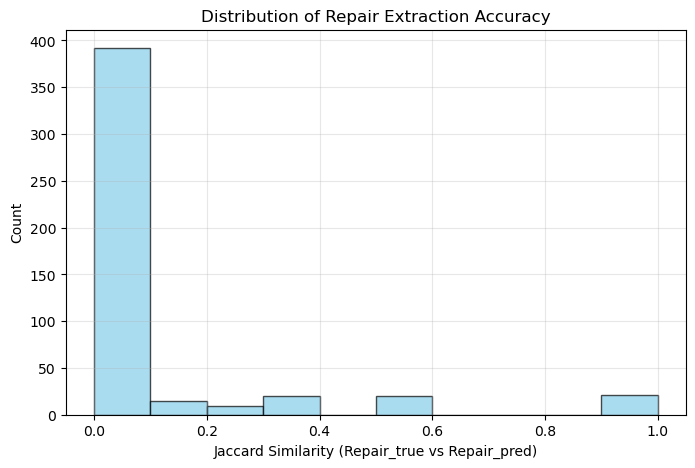

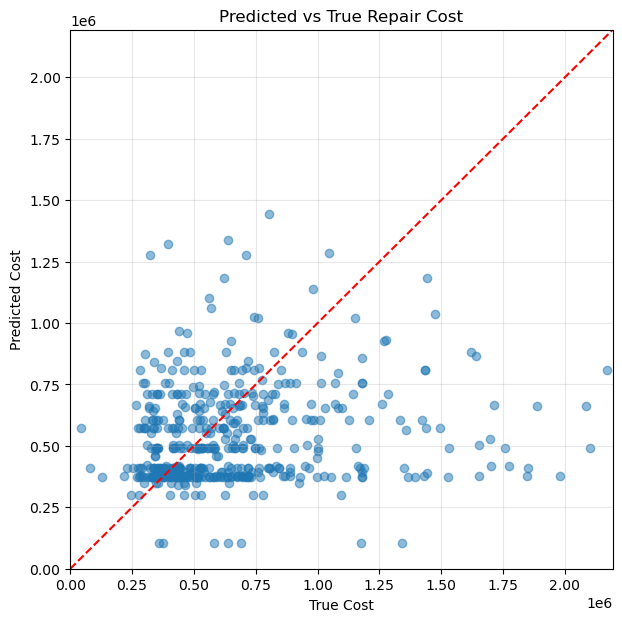

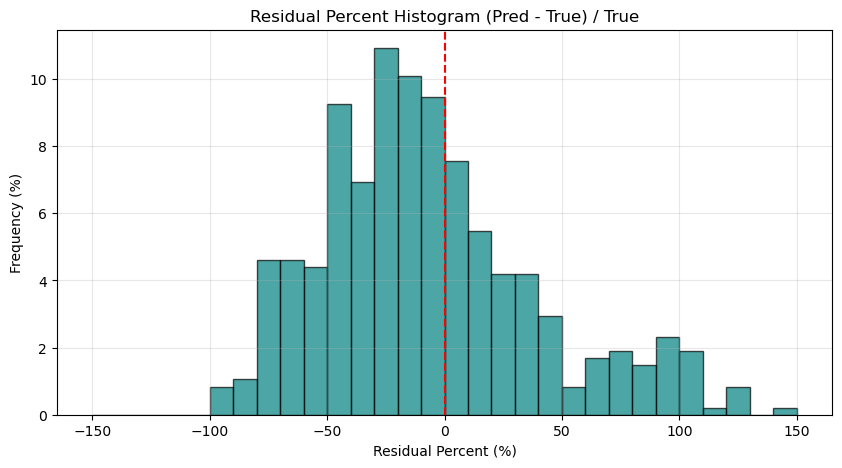

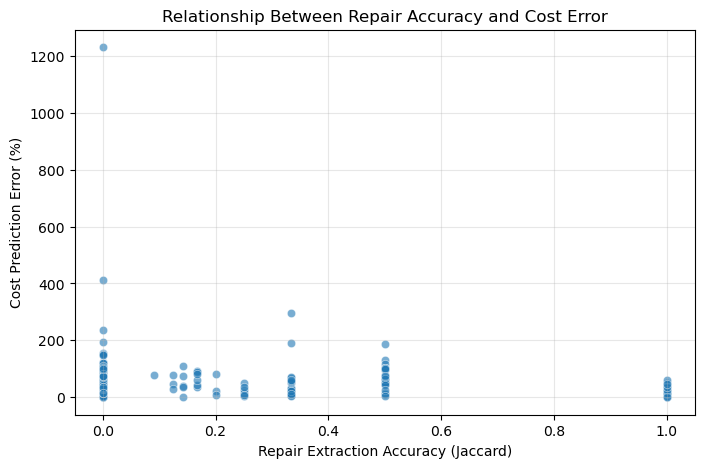


===== 요약 통계 =====
          jaccard  error_percent
count  476.000000     476.000000
mean     0.088124      43.599836
std      0.230991      67.060297
min      0.000000       0.038986
25%      0.000000      15.203878
50%      0.000000      34.311123
75%      0.000000      57.438934
max      1.000000    1230.278875


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# -------------------------------
# ⚙️ 1) 데이터 준비
# -------------------------------
df = result.copy()

df = df[df["pred_cost"].notna()]  # NaN 제거 (unknown 제외된 것)

# 수리비 오차 계산
df["abs_error"] = np.abs(df["pred_cost"] - df["total_cost"])
df["error_percent"] = df["abs_error"] / df["total_cost"] * 100
df["signed_percent"] = (df["pred_cost"] - df["total_cost"]) / df["total_cost"] * 100


# -------------------------------
# 🧩 2) Repair 추출 정확도 측정
# (정확도 = 교집합 / 합집합 Jaccard)
# -------------------------------
def parse_repair(r):
    """ repair 문자열 → set 구조로 변환 """
    if pd.isna(r) or r.strip() == "":
        return set()

    items = r.split("|")
    out = set()
    for it in items:
        it = it.strip()
        if it != "":
            out.add(it)
    return out

true_sets = df["repair_true"].apply(parse_repair)
pred_sets = df["repair_pred"].apply(parse_repair)

df["jaccard"] = [
    len(t & p) / len(t | p) if len(t | p) > 0 else 1
    for t, p in zip(true_sets, pred_sets)
]


# -------------------------------
# 📊 3) Jaccard 분포 히스토그램
# -------------------------------
plt.figure(figsize=(8, 5))
plt.hist(df["jaccard"], bins=10, range=(0,1), alpha=0.7, color="skyblue", edgecolor="black")
plt.xlabel("Jaccard Similarity (Repair_true vs Repair_pred)")
plt.ylabel("Count")
plt.title("Distribution of Repair Extraction Accuracy")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 4) 수리비 예측 — True vs Pred 산점도
# -------------------------------
plt.figure(figsize=(7, 7))
plt.scatter(df["total_cost"], df["pred_cost"], alpha=0.5)
lim = df["total_cost"].quantile(0.98)
plt.plot([0, lim], [0, lim], "r--")  # equal line
plt.xlim(0, lim)
plt.ylim(0, lim)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs True Repair Cost")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 5) Residual Percent Histogram
# -------------------------------
plt.figure(figsize=(10, 5))
bins = np.arange(-150, 160, 10)

plt.hist(df["signed_percent"], bins=bins, alpha=0.7,
         weights=np.ones(len(df))/len(df)*100,  # %로 표시
         color='teal', edgecolor='black')

plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual Percent (%)")
plt.ylabel("Frequency (%)")
plt.title("Residual Percent Histogram (Pred - True) / True")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 6) Repair 정확도 vs Cost 오차 관계
# -------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["jaccard"], y=df["error_percent"], alpha=0.6)
plt.xlabel("Repair Extraction Accuracy (Jaccard)")
plt.ylabel("Cost Prediction Error (%)")
plt.title("Relationship Between Repair Accuracy and Cost Error")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 7) 요약 통계
# -------------------------------
print("\n===== 요약 통계 =====")
print(df[["jaccard", "error_percent"]].describe())
